# 处理数据

进入代码目录：

In [1]:
cd ../../apps/

e:\kaggle\pytorch-book\apps


载入模块：

In [2]:
import pandas as pd

from opt.dataset import init_dataset
from tools.toml import load_option
from utils.loader import Record
from utils.torch_loader import Loader

## 初始化数据配置

每个类别均随机选择的图片 200 张：

In [3]:
init_dataset(200)

{'E:/kaggle/datasets/building/中景村落风貌': 3380, 'E:/kaggle/datasets/building/航拍总图': 735, 'E:/kaggle/datasets/building/近景建筑风貌': 2407, 'E:/kaggle/datasets/building/远景村落风貌': 2281}


{'mask': 'D:/kaggle/dataset/mask/testing_mask_dataset',
 'fine_size': 256,
 'batch_size': 1}

载入初始化后的数据：

In [4]:
bunch = load_option('../result/dataset/all.toml')

In [5]:
bunch.keys()

dict_keys(['中景村落风貌', '航拍总图', '近景建筑风貌', '远景村落风貌'])

预览部分数据：

In [6]:
df = pd.DataFrame.from_dict(bunch)
df.head()

,中景村落风貌,航拍总图,近景建筑风貌,远景村落风貌
0,E:/kaggle/datasets/building/中景村落风貌/DSC_5525.JPG,E:/kaggle/datasets/building/航拍总图/DJI_0254.JPG,E:/kaggle/datasets/building/近景建筑风貌/IMG_0092.JPG,E:/kaggle/datasets/building/远景村落风貌/DJI_0514.JPG
1,E:/kaggle/datasets/building/中景村落风貌/PANO0004.JPG,E:/kaggle/datasets/building/航拍总图/DJI_0370.JPG,E:/kaggle/datasets/building/近景建筑风貌/DSC_4597.JPG,E:/kaggle/datasets/building/远景村落风貌/DJI_0771.JPG
2,E:/kaggle/datasets/building/中景村落风貌/DJI_0541 Pa...,E:/kaggle/datasets/building/航拍总图/DJI_00141.JPG,E:/kaggle/datasets/building/近景建筑风貌/IMG_2205.JPG,E:/kaggle/datasets/building/远景村落风貌/DSC_4817.JPG
3,E:/kaggle/datasets/building/中景村落风貌/DSC_9202.JPG,E:/kaggle/datasets/building/航拍总图/DJI_0300.JPG,E:/kaggle/datasets/building/近景建筑风貌/IMG_1494.JPG,E:/kaggle/datasets/building/远景村落风貌/IMG_18351.JPG
4,E:/kaggle/datasets/building/中景村落风貌/DJI_0181.JPG,E:/kaggle/datasets/building/航拍总图/DJI_0826.JPG,E:/kaggle/datasets/building/近景建筑风貌/DJI_0106.JPG,E:/kaggle/datasets/building/远景村落风貌/IMG_1845.jpg


## 图片可视化

In [7]:
dataset = Record(bunch)

获取第一张图片：

In [8]:
img, index = dataset[0]
label = dataset.class_names[index]
print('标签是：', label)

标签是： 中景村落风貌


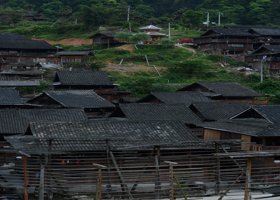

In [9]:
img.resize((280, 200))

## 转换为 torch 数据

In [10]:
mask_root = 'D:/kaggle/dataset/mask/testing_mask_dataset'  # mask 根目录
fine_size = 256  # image size
batch_size = 1   # Need to be set to 1
loader = Loader(fine_size, batch_size, mask_root, bunch)

In [11]:
trainset = loader.trainset # 训练集
maskset = loader.maskset # mask 数据集